<a href="https://colab.research.google.com/github/adhalya/estatistica-correlacao-e-regressao/blob/main/Estat%C3%ADstica_Correla%C3%A7%C3%A3o_e_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importando bibliotecas Pandas, NumPy, Seaborn, Matplotlib, Statsmodels, Scipy
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as stats
import statsmodels.api as sm
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##### Considerando a base de dados kc_house_data.csv responda as questões de 1 a 6 abaixo:

In [4]:
# Importando a base de dados kc_house_data.csv
df_house = pd.read_csv("https://raw.githubusercontent.com/adhalya/estatistica-correlacao-e-regressao/main/Arquivos%20CSV/kc_house_data.csv")
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [6]:
# Analisando as variáveis numéricas
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.549550e+09,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
std,2.863859e+09,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.114001e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,3.905010e+09,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,7.272001e+09,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?

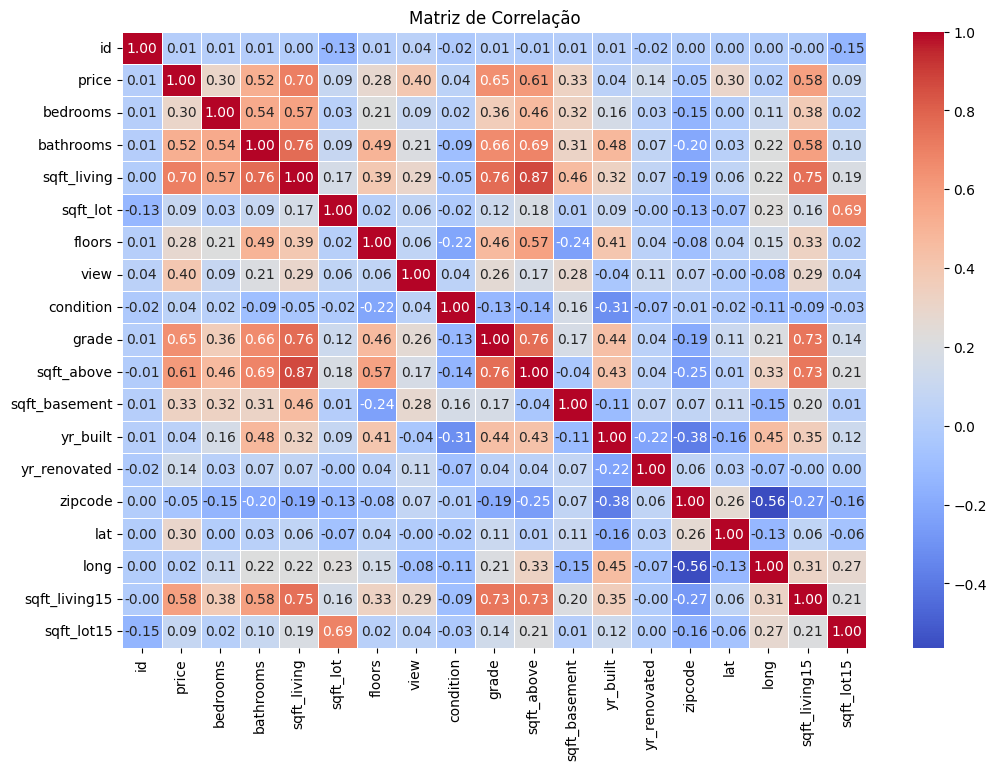

In [7]:
# Filtrando apenas as colunas numéricas
col_numericas = df_house.select_dtypes(include=['float64', 'int64'])

# Calculando a correlação de todas as variáveis numéricas
correlacao_1 = col_numericas.corr()

# Imprimindo gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao_1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [8]:
# Filtrando a correlação das variáveis 'price' e 'bedrooms'
corr_preco_quartos = correlacao_1.loc['price', 'bedrooms']
print("Correlação entre preço e número de quartos:", corr_preco_quartos)

Correlação entre preço e número de quartos: 0.299207216169182


> Considerando que o valor da correlação está mais próximo de 0 do que de 1, entende-se que não existe uma relação linear forte entre as variáveis **price** e **bedrooms**.


Analisando se existe diferença da análise anterior após filtrar: sqft_livind > 2000

In [9]:
# Filtrando casas acima de 2000 e colunas numéricas
casas_2000_sqft = df_house[df_house['sqft_living'] > 2000].select_dtypes(include=['float64', 'int64'])

# Calculando a correlação
corr_casas_2000_sqft = casas_2000_sqft.corr()

#Filtrando a correlação das variáveis 'price' e 'bedrooms'
corr_preco_quartos_casas2000 = corr_casas_2000_sqft.loc['price', 'bedrooms']
print("Correlação entre preço e número de quartos considerando casas com 2000 pés quadrados:", corr_preco_quartos_casas2000)

Correlação entre preço e número de quartos considerando casas com 2000 pés quadrados: 0.11912115548964207


> Após filtrar casas com mais de 2000 pés quadrados, continuamos sem encontrar uma relação linear forte entre as variáveis **price** e **bedrooms**.

2. Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?


In [10]:
banheiros_2 = df_house[df_house["bathrooms"] >= 2].select_dtypes(include=['float64', 'int64'])

corr_banheiros_2 = banheiros_2.corr()

corr_preco_area_2banh = corr_banheiros_2.loc['price', 'sqft_living']

print("Correlação entre preço e área total da casa considerando casas com pelo menos 2 banheiros:", corr_preco_quartos_casas2000)



Correlação entre preço e área total da casa considerando casas com pelo menos 2 banheiros: 0.11912115548964207


> Por conta do valor próximo a 0, compreende-se que não existe uma relação linear forte entre as variáveis **price** e **sqft_living** com casas que possuam a partir de 2 banheiros.

3. Como a quantidade de banheiros bathrooms influencia na correlação
entre a área total da casa sqft_living e o preço price?

In [25]:
# Calculando a correlação entre área total e preço
corr_area_preco = df_house['sqft_living'].corr(df_house['price'])

# Calculando a correlação entre área total e preço considerando a quantidade de banheiros
corr_area_preco_banheiros = df_house[['sqft_living', 'bathrooms', 'price']].corr().loc['sqft_living', 'price']

# Entendendo se a quantidade de banheiros influencia na correlação entre a área total da casa e o preço
if corr_area_preco_banheiros > corr_area_preco:
    print("Existe uma correlação maior da área total e preços quando cosiderado a quantidade de banheiros.")
else:
    print("Existe uma correlação menor da área total e preços quando cosiderado a quantidade de banheiros.")

Existe uma correlação maior da área total e preços quando cosiderado a quantidade de banheiros.


4. Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?


In [12]:
# Filtrando casas com áreas maiores que 3000 pés quadrados
area_maior_3000 = df_house[df_house['sqft_living'] > 3000]

# Adicionando uma constante ao DataFrame
X = sm.add_constant(area_maior_3000['condition'])
y = area_maior_3000['price']

# Ajustando o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Imprimindo os resultados da regressão
print(f"Regressão linear de quartos e preço considerando uma área maior que 3000 pés quadrados):")
print(modelo.summary())

Regressão linear de quartos e preço considerando uma área maior que 3000 pés quadrados):
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     14.73
Date:                Fri, 10 May 2024   Prob (F-statistic):           0.000130
Time:                        17:22:29   Log-Likelihood:                -19539.
No. Observations:                1316   AIC:                         3.908e+04
Df Residuals:                    1314   BIC:                         3.909e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

> Considerando que o R-quadrado (0.011) é mais próximo de 0 do que de 1, entende-se que as variáveis **price** e **sqft_living** não possuem relação linear forte em situações de casas com área maior que 3000 pés quadrados.

5. Existe alguma correlação entre a localização geográfica lat e long e o
preço price para casas com pelo menos três quartos bedrooms?

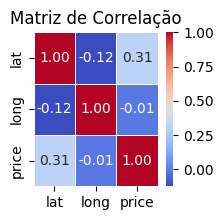

In [13]:
# Calculando a correlação entre 'lat' e 'price' considerando o filtro de casas com quartos a partir de 3 quartos
banheiros_3 = df_house[df_house['bedrooms'] >=3]

corr_quartos_precos_lat_long = banheiros_3[['lat', 'long', 'price']].corr()

# Visualização através de gráfico
plt.figure(figsize=(2, 2))
sns.heatmap(corr_quartos_precos_lat_long, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

> Visualmente é possível perceber que a latitude possui um poder de influência positiva maior que a longitude, no entanto, por ambas estarem próximas ao numeral 0, conclui-se que a latitude e a longitude não influenciam de maneira considerável o preço dos imóveis.

6. Calcule a correlação entre uma variável categórica(waterfront) e uma
variável numérica(price) usando ANOVA.


In [14]:
# Conversão de variável para o tipo 'category'
df_house['waterfront'] = df_house['waterfront'].astype('category')

# Agrupando os preços (price) por cada categoria de 'waterfront'
beira_mar = [group['price'] for name, group in df_house.groupby('waterfront')]

# Calculando a ANOVA
resultado_anova = f_oneway(*beira_mar)

print("Valor p:", resultado_anova.pvalue,"\n")

if resultado_anova.pvalue > 0.05:
    print("A variável categórica 'waterfront' não se correlaciona com a variável numérica 'price'.")
else:
    print("A variável categórica 'waterfront' se correlaciona com a variável numérica 'price'.")




Valor p: 2.97380815121432e-202 

A variável categórica 'waterfront' se correlaciona com a variável numérica 'price'.


##### **Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:**


In [15]:
# Importando base de dados car_price.csv
df_car = pd.read_csv("https://raw.githubusercontent.com/adhalya/estatistica-correlacao-e-regressao/main/Arquivos%20CSV/car_price.csv")
df_car.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [16]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [17]:
# Analisando as variáveis numéricas
df_car.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e
dê exemplos de correlações positivas, negativas e neutras.



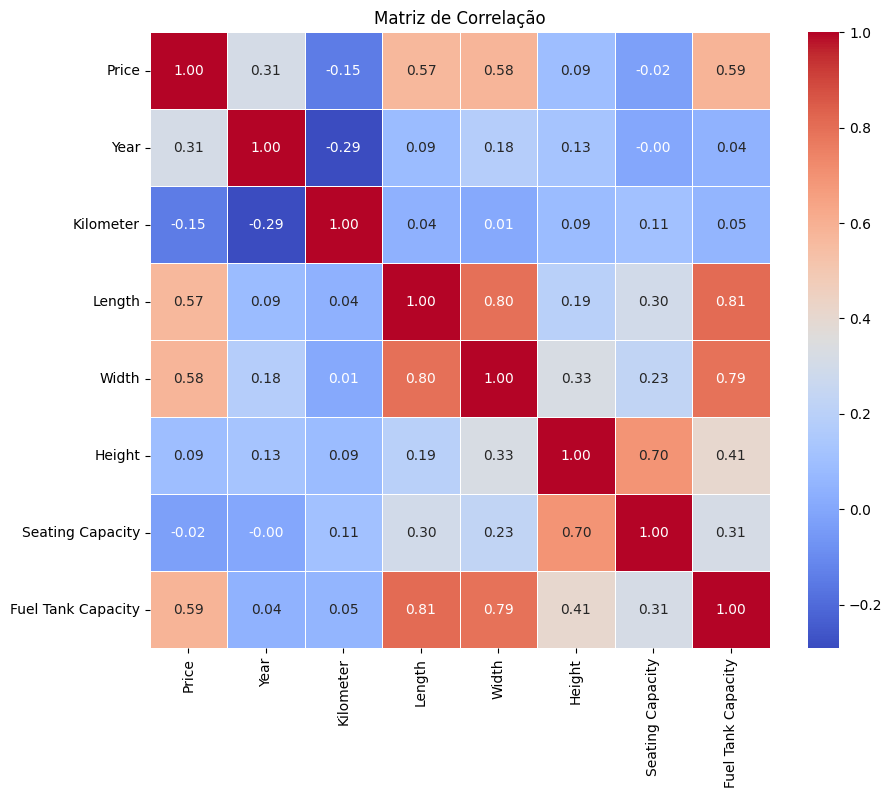

In [18]:
# Filtrando somente as variáveis numéricas
df_num_car = df_car.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação
corr_carros = df_num_car.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_carros, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

> - **Corelação Positiva:** A correlação positiva ocorre quando o coeficiente de correlação se encontra o mais próximo possível de 1, um exemplo de correlação positiva são as variáveis **Fuel Tank Capacity** e **Lenght**. A proximidade de 1 indica que se uma variável aumenta, a outra variável aumenta na mesma proporção.
- **Correlação Negativa:** A correlação negativa ocorre quando o coeficiente de correlação se encontra o mais próximo possível de -1, as variáveis contidas em df_car não se encontram tão próximas de -1, portanto, não possuem uma relação linear negativa forte, ou seja, quanto maior o valor de uma variável, menor o valor da outra variável proporcionalmente.
- **Correlação Neutra:** A correlação neutra ocorre quando o coeficiente de correlação se encontra o mais próximo possível de 0, demonstrando que as variáveis não se relacionam, ou seja, uma não depende da outra quando há algum aumento. Um exemplo são as variáveis **Year** e **Seating Capacity**.

8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price.


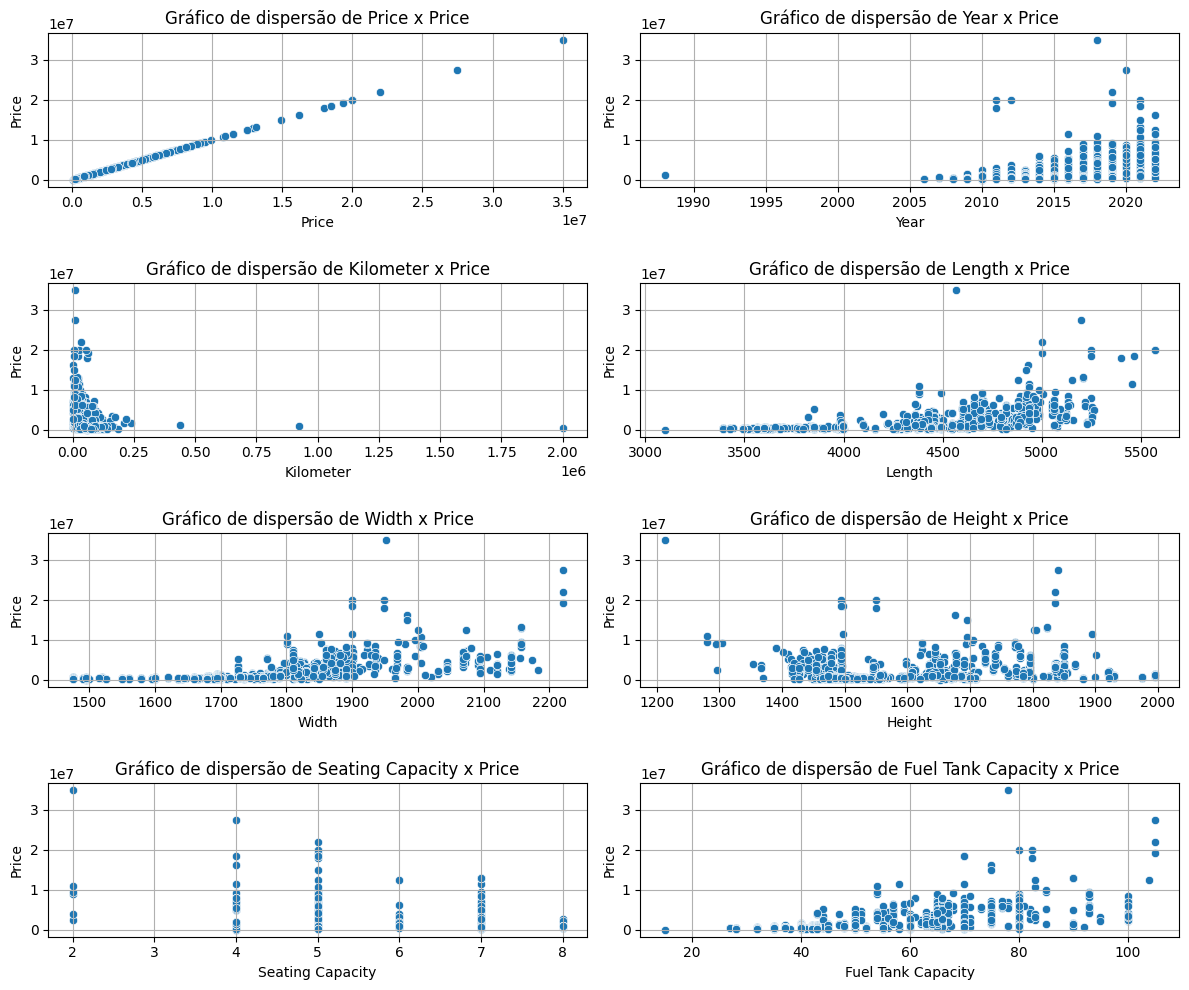

In [19]:
# Plotando 1 gráfico de dispersão para cada variável numérica utilizando uma condição
plt.figure(figsize=(12, 10))
for i, var in enumerate(df_num_car, start=1):
    plt.subplot(4, 2, i)
    sns.scatterplot(data=df_num_car, x=var, y='Price')
    plt.title(f'Gráfico de dispersão de {var} x Price')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.grid(True)

plt.tight_layout()
plt.show()

> Através dos gráficos de dispersão acima é possível perceber visualmente a relação entre 'price' e as demais variáveis numéricas.

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.


Tabela de Regressão:
Coeficiente (intercept): 3056.627621279831
Coeficiente (slope): 23.437991095863605


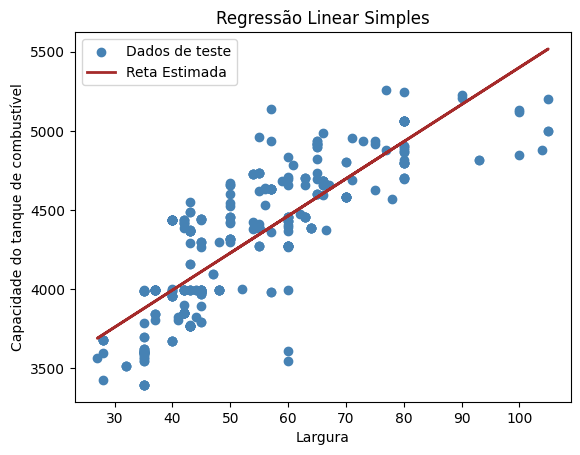

In [20]:
# Filtrando as variáveis de uso no modelo
X = df_car['Fuel Tank Capacity'].values.reshape(-1, 1)
y = df_car['Length'].values

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de Regressão Linear Simples
model = LinearRegression()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

# Exibindo a tabela de regressão (coeficientes)
print("Tabela de Regressão:")
print("Coeficiente (intercept):", model.intercept_)
print("Coeficiente (slope):", model.coef_[0])

# Plotando a reta estimada
plt.scatter(X_test, y_test, color='steelblue', label='Dados de teste')
plt.plot(X_test, y_pred, color='brown', linewidth=2, label='Reta Estimada')
plt.xlabel('Largura')
plt.ylabel('Capacidade do tanque de combustível')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()

> Para o modelo de regressão linear simples utilizei as variáveis com maior correlação de acordo com a matriz de correlação (**Length** e **Fuel Tank Capacity**).

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.


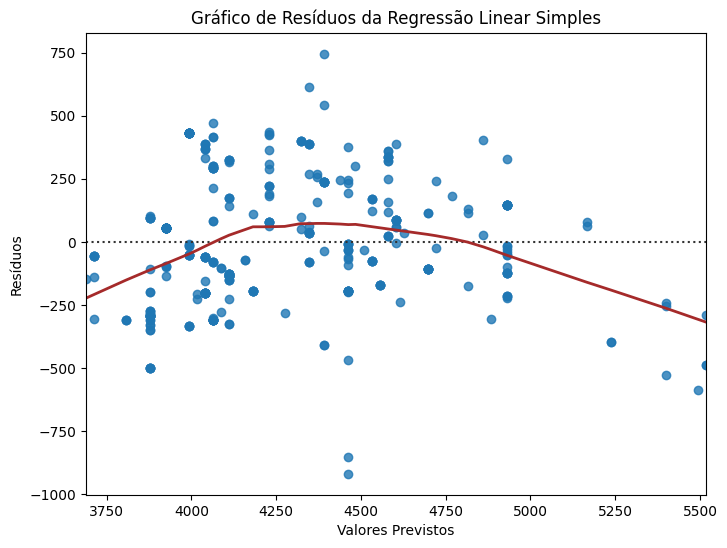

In [21]:
# Calculando os resíduos do modelo
residuos = y_test - y_pred

# Plotando o gráfico dos resíduos
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuos, lowess=True, line_kws={'color': 'brown', 'lw': 2})
plt.title('Gráfico de Resíduos da Regressão Linear Simples')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão
e exiba o gráfico dos resíduos do modelo.

Tabela de Regressão:
Coeficiente (intercept): -347424874.60392874
Coeficientes (slope): [ 1.69145404e+05 -2.71391870e+00  1.45057327e+03  1.39918467e+03
 -4.54626510e+02 -4.58059943e+05  4.91248417e+04]


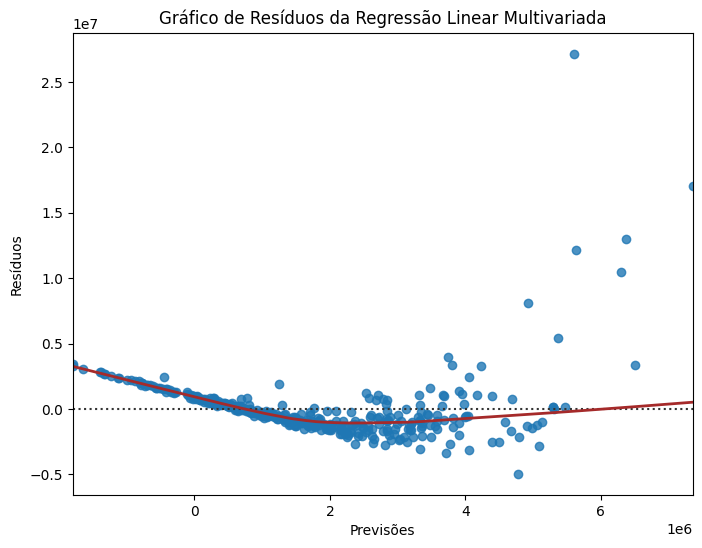

In [22]:
# Selecionando as variáveis independentes e a variável dependente
X = df_car[['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']]
y = df_car['Price']  # Variável dependente

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de Regressão Linear Multivariada
model = LinearRegression()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

# Exibindo a tabela de regressão (coeficientes)
print("Tabela de Regressão:")
print("Coeficiente (intercept):", model.intercept_)
print("Coeficientes (slope):", model.coef_)

# Calculando os resíduos do modelo
residuos2 = y_test - y_pred

# Plotando o gráfico dos resíduos
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuos2, lowess=True, line_kws={'color': 'brown', 'lw': 2})
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos da Regressão Linear Multivariada')
plt.show()